In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import re
#import nltk
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
#from keras.layers import Input, Dense
#from keras.models import Model, Sequential
#from keras import regularizers

In [2]:
# reading tweets data
df=pd.read_csv('/content/nlp_vader_textblob_classified_data_updated.csv')
#df_test=pd.read_csv('/content/nlp_vader_textblob_classified_data_updated.csv')

In [3]:
df=df.drop(['username', 'date', 'country','replyCount', 'retweetCount', 'likeCount', 'url', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_comp','TextBlob_Subjectivity', 'TextBlob_Polarity', 'TextBlob_Analysis', 'content', 'class', 'label', 'cleantext_no_spell' ,'verified', 'followersCount', 'hashtags', 'primaryTeam'],axis=1)
#df_new = df
#df= df.drop([ 'label'], axis =1)
#df_test=df_test.drop(['username', 'date', 'country', 'inference', 'content','replyCount', 'retweetCount', 'likeCount', 'url', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_comp','TextBlob_Subjectivity', 'TextBlob_Polarity', 'TextBlob_Analysis'],axis=1)


In [4]:
df.head()

,vader_preprocessing_text,final_class
0,haaland - the new poster boy for an anti-democ...,-1.0
1,manchester city about to unleash the new dynam...,1.0
2,"knowing teams can use 5 subs, found it stra...",-1.0
3,big day for all fans yesterday! if you fancy ...,1.0
4,3 goals in 5 and a half minutes is a helluva w...,1.0


In [5]:
# getting value counts for each sentiment in train df
print("Label   Count")
df['final_class'].value_counts()

Label   Count


 0.0    2988
 1.0    2659
-1.0    2396
Name: final_class, dtype: int64

#pca

In [6]:
#create feature vectors using tfidf
vectorizer = TfidfVectorizer()
text_features_train = vectorizer.fit_transform(df['vader_preprocessing_text'].values.astype('U'))
text_features_train.shape

(8044, 9320)

In [8]:
# declaring PCA with 3 components
pca = PCA(n_components=3)
pca.fit(text_features_train.toarray())
features_train = pca.transform(text_features_train.toarray())
features_train.shape

(8044, 3)

In [9]:

# adding pca components to df
df_features_train = pd.DataFrame(features_train)
df_features_train = pd.concat([df_features_train, df[['final_class']]], axis=1, ignore_index=True)
df_features_train.columns = ['pca_1', 'pca_2', 'pca_3', 'target'] #'pca_3',
df_features_train.describe(include='all')

,pca_1,pca_2,pca_3,target
count,8.044000e+03,8.044000e+03,8.044000e+03,8043.000000
mean,-5.642208e-17,-1.460239e-17,5.658770e-18,0.032699
std,1.060574e-01,8.747482e-02,8.045548e-02,0.792153
min,-2.245013e-01,-1.574014e-01,-2.992497e-01,-1.000000
25%,-5.865941e-02,-6.730806e-02,-4.373336e-02,-1.000000
50%,-2.548566e-02,-1.007847e-02,-3.741863e-03,0.000000
75%,4.822970e-03,5.551979e-02,3.587584e-02,1.000000
max,8.610529e-01,4.686718e-01,4.408513e-01,1.000000


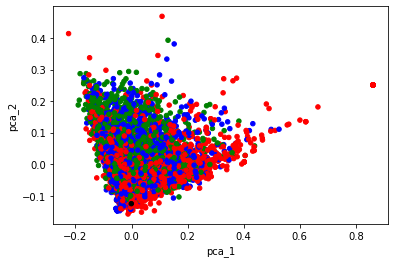

In [10]:
# plotting the scatter plot to see how we separated are the 3 sentiments in the extracted PCA components
cmap = {0: 'red', 1: 'blue', -1: 'green'}
df_features_train.plot(kind='scatter', x='pca_1', y='pca_2', c=[cmap.get(t, 'black') for t in df_features_train['target']])


In [11]:
# for reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

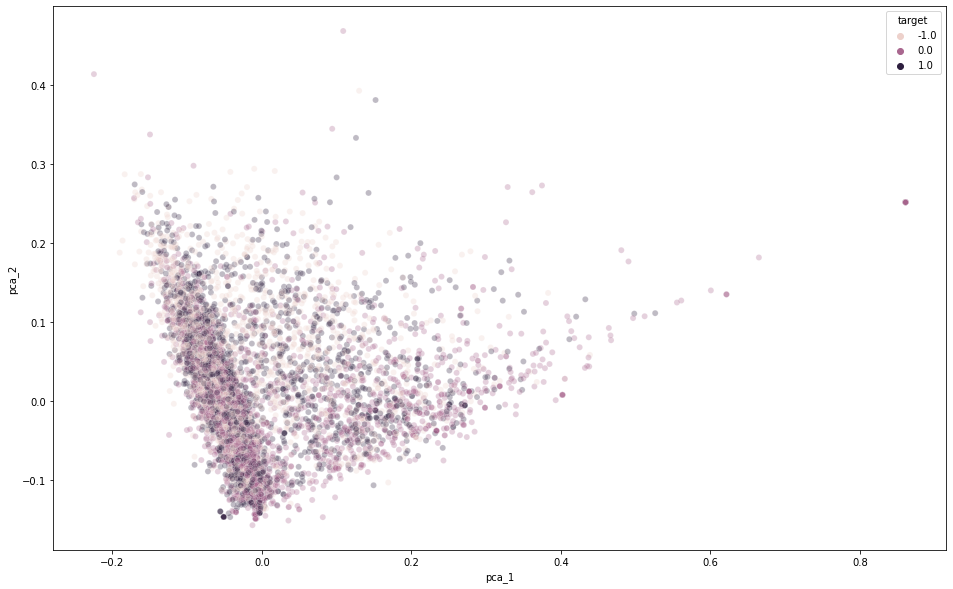

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="target",
    data=df_features_train.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

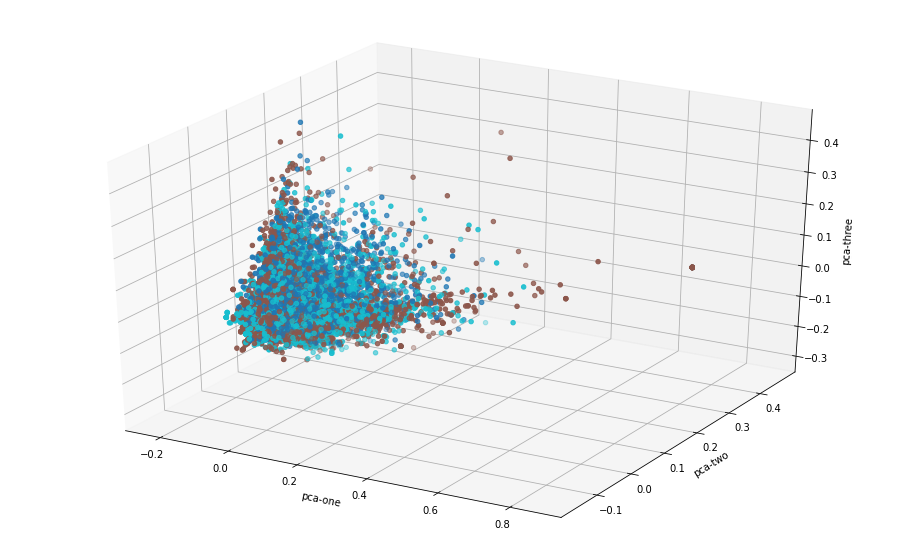

In [14]:
# 3d plot
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_features_train.loc[rndperm,:]["pca_1"], 
    ys=df_features_train.loc[rndperm,:]["pca_2"], 
    zs=df_features_train.loc[rndperm,:]["pca_3"], 
    c=df.loc[rndperm,:]["final_class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()